# 0. INTRODUÇÃO

A análise abaixo foi feita utilizando dados do RH da IBM que foram disponibilizados no site www.kaggle.com.

Nossa ideia é entender o perfil das pessoas que deixam a empresa, o que pode ser importante para previnir demissões, diminuir custos
e aumentar a satisfação dos empregados, o que deve melhorar a produtividade da empresa.

 Insights que foram tirados desta breve analise: 
- vemos que a grande maioria dos funcionarios estão entre 25 e 45 anos
- Pode-se perceber que a grande maioria dos funcionarios recebe um salario base, o que pode gerar uma insatisfação e maior numero de pedidos de demissão
- De maneira geral, observa-se que funcionários com salário de até R$ 5.000 tendem a apresentar um maior nível de atrito com a empresa.
- Pode-se perceber que o número de demissões é mais alto na faixa etária de 20 a 30 anos
- Percebe-se que o maior número de pessoas que têm atrito com a empresa é composto por aqueles que estão há pouco tempo na organização, têm entre 20 e 30 anos e recebem um salário de até R$ 5.000. Além disso, a empresa não apresenta uma disparidade significativa de salários entre gêneros. Para resolver essa situação, a empresa poderia implementar programas de integração e desenvolvimento profissional para os novos funcionários, além de realizar análises salariais regulares para garantir a equidade de remuneração e aumentar a satisfação dos colaboradores, especialmente entre os jovens


*OBS: Fluxograma da analise:  analisar a estrutura do dataset > análise univariada > análise bivariada > análise multivariada*

# 1. Carregando Biblotecas

In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# 2. Carregando DATASET

In [ ]:
rh = read_csv('WA_Fn-UseC_-HR-Employee-Attrition')

In [7]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
rh.shape

(1470, 35)

In [11]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 3. Análise Univariada

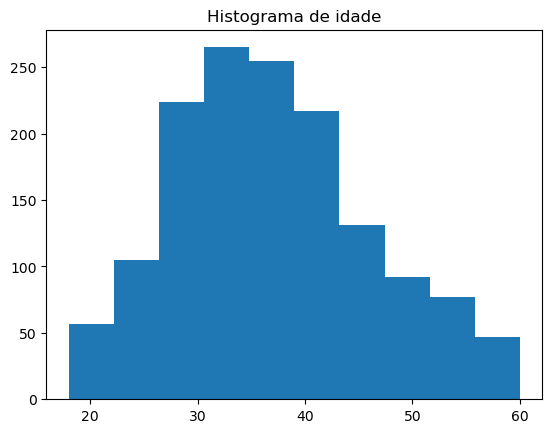

In [17]:
_ = plt.hist(rh.Age)
_ = plt.title("Histograma de idade")

-Vemos que a grande maioria dos funcionarios estão entre 25 e 45 anos

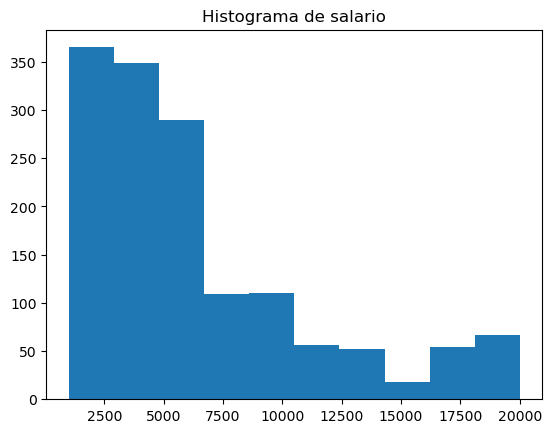

In [19]:
_ = plt.hist(rh.MonthlyIncome)
_ = plt.title("Histograma de salario")

Pode-se perceber que a grande maioria dos funcionarios recebe um salario base, o que pode gerar uma insatisfação e maior numero de pedidos de demissão

In [23]:
rh.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [24]:
rh.Gender.value_counts(1)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

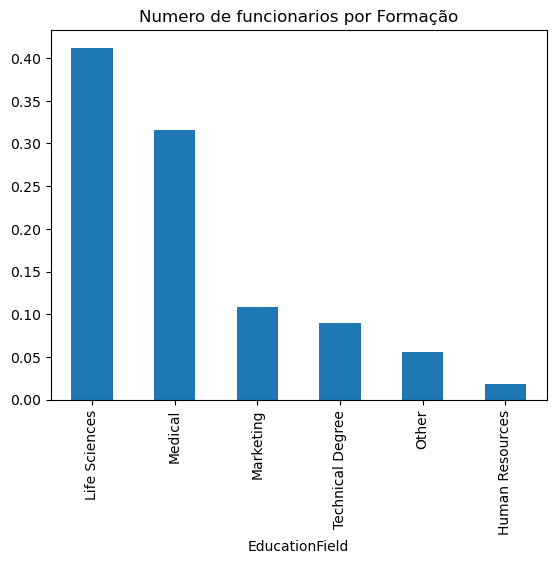

In [32]:
_ = rh.EducationField.value_counts(1).plot.bar()
_ = plt.title("Numero de funcionarios por Formação")

Neste grafico pode-se análisar que as áreas com maior numeros de funcionarios são Life sciences e medical, a area que tem menor numero de contratados é a de RH.

# 4. Análise Bivariada

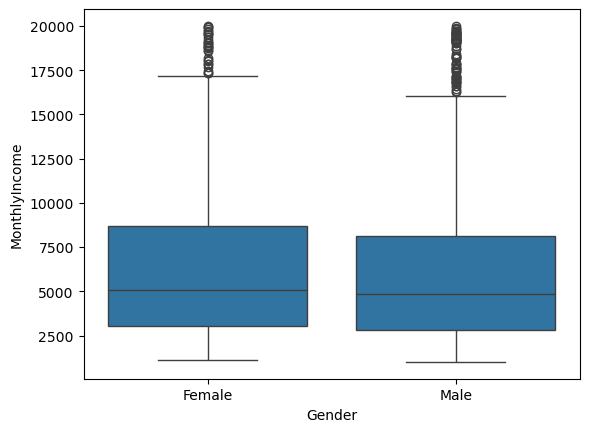

In [33]:
_ = sns.boxplot(x='Gender', y='MonthlyIncome', data=rh)

Curiosamente, a distribuição é bastante similar. No entanto, normalmente seria esperado observar uma disparidade na distribuição salarial entre os gêneros.

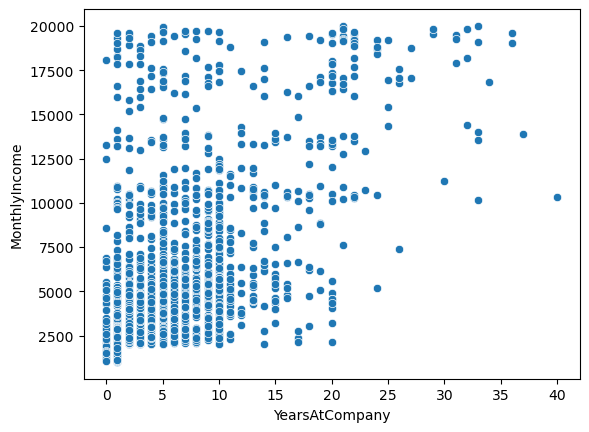

In [36]:
_ = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data = rh )

Este grafico, não consegue nos ajudar muito, pois à partir dele, não conseguimos tirar nenhuma conclusão para auxiliar a resolução de nosso problema

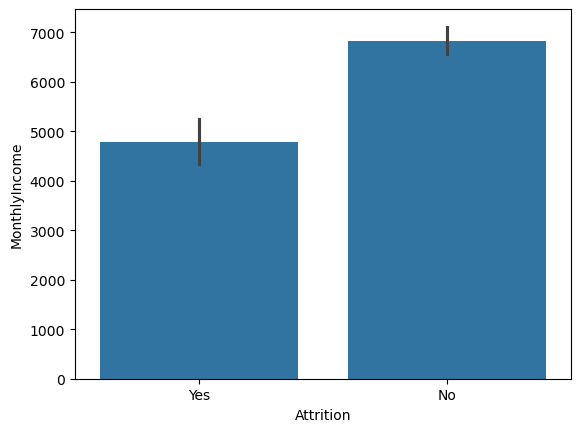

In [47]:
_ = sns.barplot(x='Attrition', y='MonthlyIncome', data = rh )

De maneira geral, observa-se que funcionários com salário de até R$ 5.000 tendem a apresentar um maior nível de atrito com a empresa.

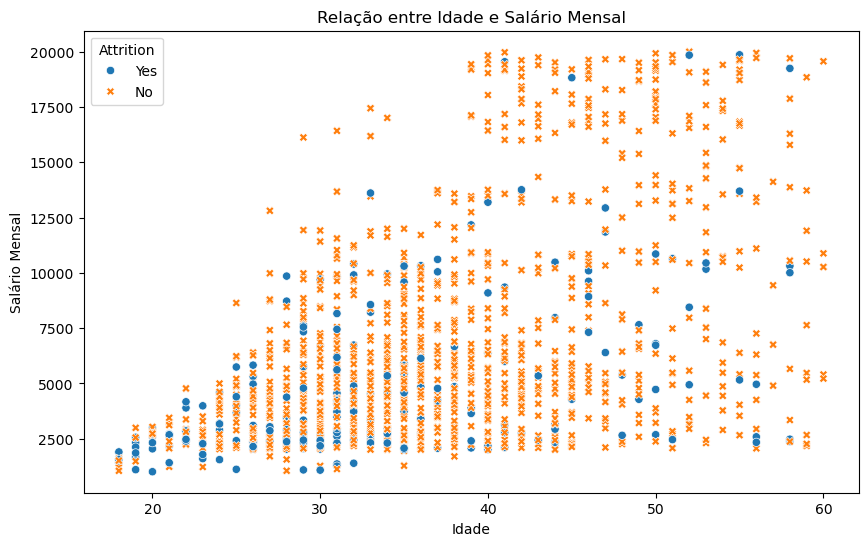

In [48]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=rh, hue='Attrition', style='Attrition')
plt.title("Relação entre Idade e Salário Mensal")
plt.xlabel("Idade")
plt.ylabel("Salário Mensal")
plt.show()


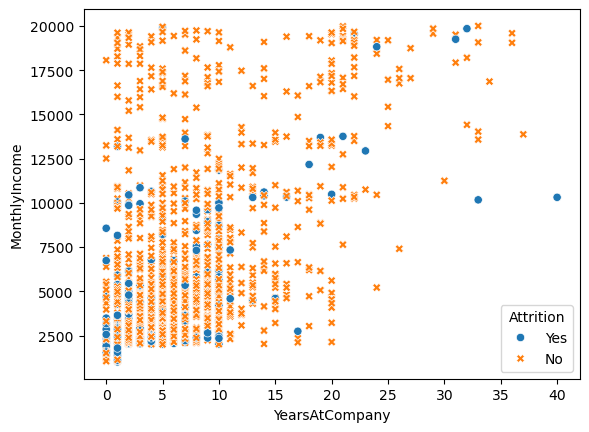

In [49]:
_ = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data=rh, hue='Attrition', style='Attrition')